# Exercise: Feature Extraction in OpenCV

In this exercise, we extract important image features like gradients, edges and corners in OpenCV. This is fundamental for image interpretation and object recognition. Your tasks are the following:

- Calculate image gradients and plot the result
- Detect edges using Canny edge detector
- Detect corners using Harris corner detector

In [8]:
# imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Data Acquision

In [9]:
# load image
input_img = cv2.imread ('../../images/san_francisco_bay.jpg') 

# convert image to RGB and grayscale (matplotlib uses RGB, OpenCV uses BGR)
img_RGB = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)

Text(0.5, 1.0, ' San Francisco Bay')

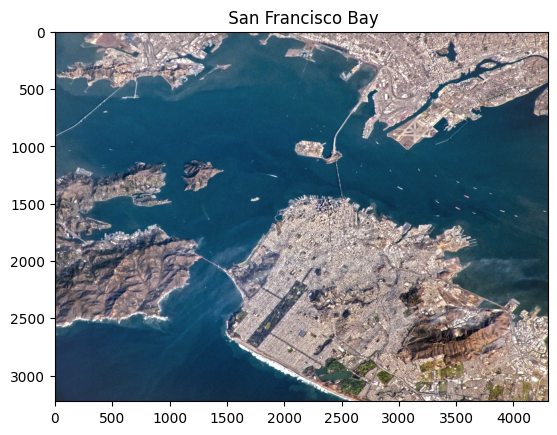

In [10]:
# display image
plt.imshow(img_RGB)
plt.title(' San Francisco Bay')

## 2. Image Manipulation and Preprocessing

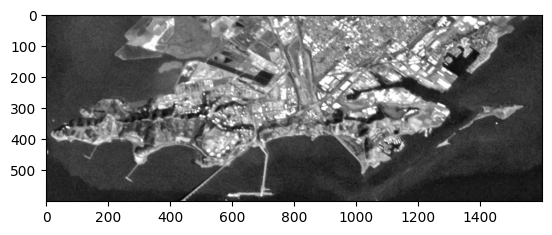

In [11]:
# we can make a cutout to work with a smaller part of the image (slicing)
cutout_RGB = img_RGB[0:600, 0:1600]
# cutout_RGB = img_RGB[0:img_RGB.shape[0], 0:img_RGB.shape[1]]
cutout_gray = cv2.cvtColor(cutout_RGB, cv2.COLOR_RGB2GRAY)
plt.imshow(cutout_gray, cmap='gray')

## 3. Feature Extraction

**TODO**: Calculate the gradient in `x` and in `y` of the cutout, respectively, using the Sobel operator, and plot the gradient images. Calculate the magnitude of the gradient and plot it as well. Finally, threshold the gradient and plot a binary image of the gradients (white if a pixel's gradient is above the threshold, black otherwise)

Text(0.5, 1.0, 'thresholded gradient magnitude')

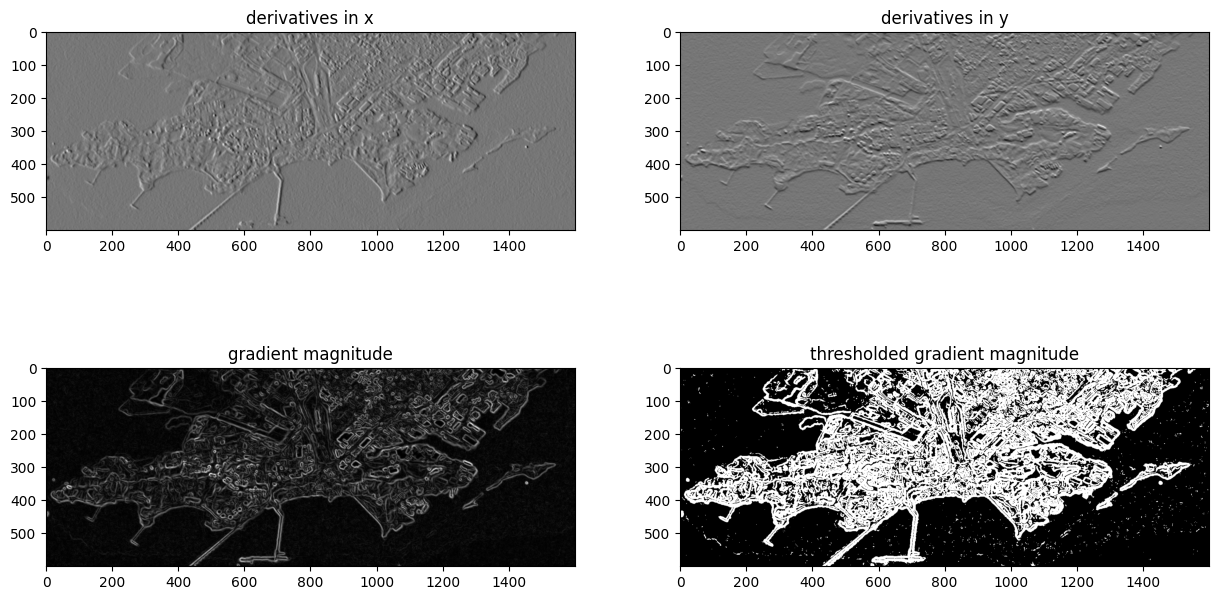

In [12]:
# calculate the gradient of the image using the Sobel operator
sobelx = cv2.Sobel(cutout_gray,cv2.CV_64F,1,0,ksize=9)
sobely = cv2.Sobel(cutout_gray,cv2.CV_64F,0,1,ksize=9)

# calculate the magnitude of the gradient (edge strength)
magnitude = cv2.magnitude(sobelx, sobely)

# normalize the magnitude to be in the range [0,255]
normalizedMagnitude = np.zeros(np.shape(magnitude))
normalizedMagnitude = cv2.normalize(magnitude,  normalizedMagnitude, 0, 255, cv2.NORM_MINMAX)

# threshold the magnitude to get a binary image
ret,thresh = cv2.threshold(normalizedMagnitude,20,255,cv2.THRESH_BINARY)

# plot results
fig, axs = plt.subplots(2,2, figsize=(15, 8))
axs[0,0].imshow(sobelx,cmap = 'gray') 
axs[0,0].set_title('derivatives in x')
axs[0,1].imshow(sobely,cmap = 'gray') 
axs[0,1].set_title('derivatives in y') 
axs[1,0].imshow(normalizedMagnitude,cmap = 'gray')  
axs[1,0].set_title('gradient magnitude')
axs[1,1].imshow(thresh,cmap = 'gray')  
axs[1,1].set_title('thresholded gradient magnitude')

**TODO**: Blur the image to remove noise. Then apply the Canny edge detector to extract edges in the blurred image. Plot the detected edges in the original image. Can you adapt the Canny detector parameters to improve your result?

**HINT:** Check out OpenCV's GaussianBlur() and Canny() functions!

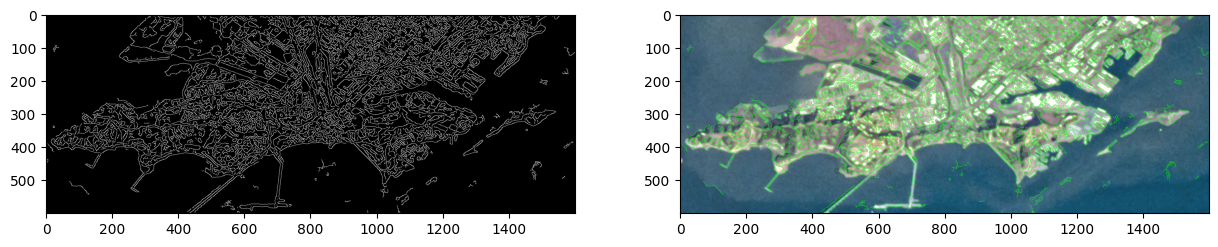

In [13]:
# Parameters for Canny edge detection
threshold1 = 10
threshold2 = 50  # Canny recommends threshold 2 is 3 times threshold 1 - you could try experimenting with this...
blur_radius = 3  # Gaussian blur

# Blur the image to remove noise
blurred_image = cutout_RGB.copy()
blurred_image = cv2.GaussianBlur(blurred_image, (2 * blur_radius + 1, 2 * blur_radius + 1), -1)
# Note: -1 used for sigma = Gaussian standard deviation 
# if it is non-positive, it is computed from ksize as sigma = 0.3*((ksize-1)*0.5 - 1) + 0.8 

# Convert to grayscale
gray_image = cv2.cvtColor(blurred_image, cv2.COLOR_RGB2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray_image, threshold1, threshold2)

# Highlight edges in the original image
blurred_image[edges != 0] = (0, 255, 0)  # This takes pixels in blurred_image where edges are non-zero and colors them bright green

# Plot result
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
ax1.imshow(edges, cmap='gray')
ax2.imshow(blurred_image)

In [14]:
# new cutout for corner detection (copy to avoid changing the original image)
cutout_RGB_2 = img_RGB[1200:2000, 1500:3500].copy()
cutout_gray_2 = cv2.cvtColor(cutout_RGB_2, cv2.COLOR_RGB2GRAY)

**TODO**: Apply the Harris detector to extract object corners in the new cutout defined above. Plot the detected corners in red into `cutout_RGB_2`. Can you adapt the Harris parameters to improve your result?

**HINT:** You can use OpenCV's cornerHarris() function!

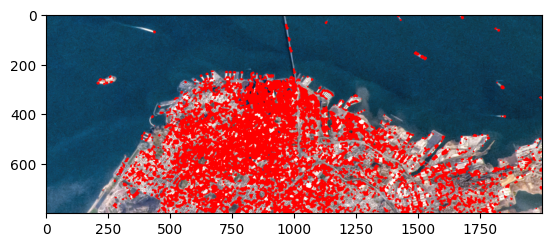

In [15]:
# parameters for corner detection
blocksize=9 # neighbourhood size for corner detection
kernel_size=5 # sobel kernel size (small odd number)

# run the harris corner detector
corners = cv2.cornerHarris(cutout_gray_2,blocksize,kernel_size,0.01) # parameters are blocksize, Sobel parameter and Harris threshold

# plot resulting corners (only the most prominent ones)
cutout_RGB_2[corners>0.02*corners.max()]=[255, 0, 0]
plt.imshow(cutout_RGB_2)